In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
import os
import pandas as pd

In [2]:
os.chdir('D:/Reshma/audio_testing')


In [3]:
filename="bear_growl_y.wav"

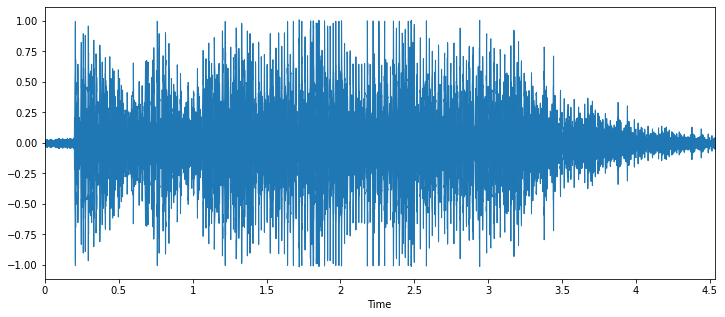

In [4]:
plt.figure(figsize=(12,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [5]:
sample_rate

22050

In [6]:
data

array([-0.02282337, -0.02658252, -0.02404397, ..., -0.01154123,
       -0.00087716,  0.00315866], dtype=float32)

In [7]:
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(30)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [8]:
#extract feature
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 196)


In [9]:
mfccs


array([[-4.1864255e+02, -3.9972955e+02, -3.9903925e+02, ...,
        -3.2298315e+02, -3.2520642e+02, -3.1242068e+02],
       [ 7.3337921e+01,  7.8683823e+01,  7.9554512e+01, ...,
         1.1970723e+02,  1.2028734e+02,  1.2679338e+02],
       [ 7.0731230e+00, -5.1521096e+00, -2.4187708e+00, ...,
         5.2510858e+00,  7.3598061e+00, -2.2688484e+00],
       ...,
       [ 2.0172743e+01,  1.0963286e+01,  3.2174191e+00, ...,
        -5.6412411e+00, -6.1714716e+00, -4.1552472e+00],
       [ 1.5047964e+01,  6.1005869e+00,  1.7469110e+00, ...,
        -4.0129292e-01, -4.2311773e-01,  8.8464826e-01],
       [ 8.2094460e+00,  6.1714239e+00,  3.0200548e+00, ...,
         8.0152435e+00,  5.5360889e+00,  1.5803331e+00]], dtype=float32)

In [10]:
audio_dataset_path='UrbanSound8K/audio/'

In [11]:
def extract_feature(file):
    audio,sample_rate=librosa.load(file,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [12]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
#UrbanSound8K/audio/fold1/
for index_num,row in tqdm(metadata.iterrows()):
    file=os.path.join(os.path.abspath(audio_dataset_path),'fold' + str(row["fold"])+'/',str(row["slice_file_name"]) )
    final_class_labels=row["class"]
    data=extract_feature(file)
    extracted_features.append([data,final_class_labels])
    

3555it [09:39,  6.93it/s]C:\Users\ELCOT\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8326it [23:01,  8.28it/s]C:\Users\ELCOT\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8328it [23:01,  9.76it/s]C:\Users\ELCOT\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [24:21,  5.97it/s]


In [13]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.180405,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [14]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [15]:
X.shape

(8732, 40)

In [16]:
#label encoding
#Y=np.array(pd.get_dummies(Y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y.shape

(8732, 10)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [19]:
import tensorflow

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [21]:
num_labels=y.shape[1]

In [22]:
model=Sequential()
#first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#Second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#Third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [24]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
#training a model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=100
num_batch_size=32


checkpointer=ModelCheckpoint(filepath='savedmodels/audio_classifier.hdf5',verbose=1,save_best_only=True)
start=datetime.now()
model.fit(X_train,Y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(X_test,Y_test),callbacks=[checkpointer])
duration=datetime.now() - start
print("Training completedin time:",duration)

Epoch 1/100
219/219 [==============================] - 2s 8ms/step - loss: 0.9009 - accuracy: 0.6958 - val_loss: 0.7309 - val_accuracy: 0.7705

Epoch 00001: val_loss improved from inf to 0.73094, saving model to savedmodels\audio_classifier.hdf5
Epoch 2/100
219/219 [==============================] - 2s 9ms/step - loss: 0.9153 - accuracy: 0.6908 - val_loss: 0.7280 - val_accuracy: 0.7762

Epoch 00002: val_loss improved from 0.73094 to 0.72803, saving model to savedmodels\audio_classifier.hdf5
Epoch 3/100
219/219 [==============================] - 2s 11ms/step - loss: 0.9020 - accuracy: 0.6985 - val_loss: 0.7281 - val_accuracy: 0.7642

Epoch 00003: val_loss did not improve from 0.72803
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 0.8961 - accuracy: 0.7044 - val_loss: 0.7146 - val_accuracy: 0.7785

Epoch 00004: val_loss improved from 0.72803 to 0.71465, saving model to savedmodels\audio_classifier.hdf5
Epoch 5/100
219/219 [==============================] - 1s 

219/219 [==============================] - 1s 5ms/step - loss: 0.9010 - accuracy: 0.7037 - val_loss: 0.7468 - val_accuracy: 0.7676

Epoch 00042: val_loss did not improve from 0.71465
Epoch 43/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9060 - accuracy: 0.6998 - val_loss: 0.7293 - val_accuracy: 0.7773

Epoch 00043: val_loss did not improve from 0.71465
Epoch 44/100
219/219 [==============================] - 2s 9ms/step - loss: 0.9147 - accuracy: 0.7029 - val_loss: 0.7625 - val_accuracy: 0.7676

Epoch 00044: val_loss did not improve from 0.71465
Epoch 45/100
219/219 [==============================] - 2s 11ms/step - loss: 0.9121 - accuracy: 0.6981 - val_loss: 0.7521 - val_accuracy: 0.7785

Epoch 00045: val_loss did not improve from 0.71465
Epoch 46/100
219/219 [==============================] - 2s 10ms/step - loss: 0.8933 - accuracy: 0.6981 - val_loss: 0.7423 - val_accuracy: 0.7682

Epoch 00046: val_loss did not improve from 0.71465
Epoch 47/100
219/219 [=========

In [ ]:
test_accuracy=model.evaluate(X_test,Y_test,verbose=0)
print(test_accuracy[1])

In [ ]:
#testing
filename="Dog_Barking.wav"
audio,sample_rate=librosa.load(file,res_type='kaiser_fast')
mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class=labelencoder.inverse_transform(predicted_label)
prediction_class